In [1]:
import numpy as np
import sys
import os
from astropy.io import fits
import pandas as pd
from statsmodels import robust
from tqdm import tqdm

Loading in custom fuctions

In [2]:
def im_sum_stat(image_name):
    light=path+"\\"+image_name
    dark=path+"\\"+image_name[0:len(image_name)-5]+"dark.fits"
    lightimg=fits.open(light)
    darkimg=fits.open(dark)
    lightdat=lightimg[0].data
    darkdat=darkimg[0].data
    subtracted=lightdat.astype(float)-darkdat.astype(float)
    signal_sum=np.sum(subtracted)
    signal_error=np.sqrt(signal_sum)
    lightimg.close()
    darkimg.close()
    return image_name,signal_sum,signal_error
def phot_sum_stat(scan_name):
    pdiode_frame=pd.read_csv(path+"\\"+scan_name)
    range(int(len(pdiode_frame['Date'])/2))
    val=[]
    errl=[]
    errd=[]
    nmeasl=[]
    nmeasd=[]
    for i in range(int(len(pdiode_frame['Date'])/2)):
        light=pdiode_frame['Mean_Phot'][2*i]
        dark=pdiode_frame['Mean_Phot'][2*i+1]
        val.append(light-dark)
        errl.append(pdiode_frame['SD_phot'][2*i])
        errd.append(pdiode_frame['SD_phot'][2*i+1])
        nmeasl.append(pdiode_frame['num_read_phot'][2*i])
        nmeasd.append(pdiode_frame['num_read_phot'][2*i+1])
    return val, errl,errd,nmeasl,nmeasd

to change scan change directory

In [3]:
path="C://Users//astrolab//Desktop//Peter_Ferguson//TCal//scans//200130/"

In [4]:
files=os.listdir(path)
images_list=[i for i in files if "nm.fits" in i ]
scan_list=[i for i in files if "scan.dat" in i ]
lamlist=[float(i[0:3]) for i in images_list ]
images_list=[x for _,x in sorted(zip(lamlist,images_list))]
print(images_list[0])
print(len(images_list))

ValueError: could not convert string to float: 'sps'

In [6]:
images_summary=[im_sum_stat(i) for i in tqdm(images_list)]

  4%|▎         | 12/325 [00:02<00:52,  5.99it/s]C:\Users\astrolab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 325/325 [00:53<00:00,  6.06it/s]


In [7]:
imstats=pd.DataFrame({'name':[i[0] for i in images_summary],'sum_img':[i[1] for i in images_summary],'error_img':[i[2] for i in images_summary]})
imstats['lam']=[float(i[0:3]) for i in imstats['name']]
imstats['phot_mean'],imstats['phot_sd_l'],imstats['phot_sd_d'],imstats['phot_nmeas_l'],imstats['phot_nmeas_d']=phot_sum_stat(scan_list[0])

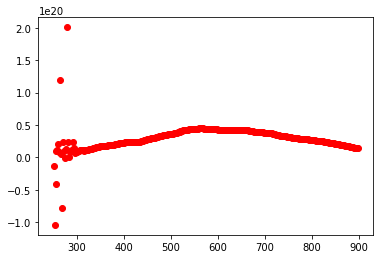

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline  
plt.plot(imstats['lam'],imstats['sum_img']/imstats['phot_mean'],"ro")

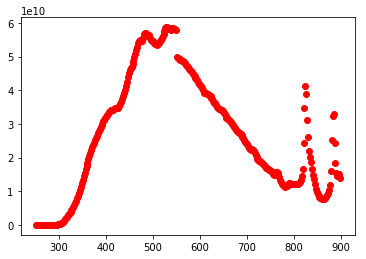

In [9]:
plt.plot(imstats['lam'],imstats['sum_img'],"ro")

In [10]:
imstats.to_csv("C:\\Users\\astrolab\\Desktop\\Peter_Ferguson\\TCal\\scans\\summaries\\scan5_2nmS_5nmBP_odd.csv", index=False)

In [23]:
sum1=pd.read_csv("C://Users//astrolab//Desktop//Peter_Ferguson//TCal//scans//summaries/190522_alluxa_can_1nm.csv")

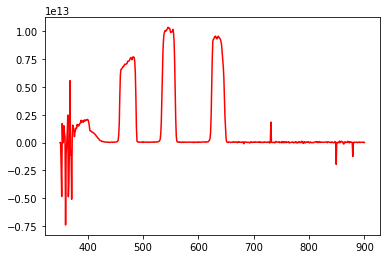

In [24]:
plt.plot(sum1['lam'],sum1['median_img']/sum1['phot_mean'],"r-")